In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all" # cell 的多行输出

# 简介

决策树模型既能做分类分析，又能做回归分析。

对应的模型分别为分类决策树模型（DecisionTreeClassifier）和回归决策树模型（DecisionTreeRegressor）

# 分类树demo

In [5]:
from sklearn.tree import DecisionTreeClassifier
X = [[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]]
y = [1, 0, 0, 1, 1]
model=DecisionTreeClassifier(random_state=0)#随机状态参数 random_state 为0，这里的0没有特殊含义，可换成其他数字。它是一个种子参数，可使每次运行结果一致
model.fit(X,y)
model.predict([[5,5]])
model.predict([[5,5],[7,7],[9,9]])

DecisionTreeClassifier(random_state=0)

array([0])

array([0, 0, 1])

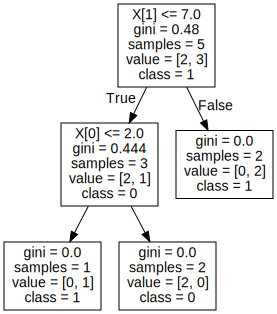

In [12]:
from sklearn.tree import export_graphviz
import graphviz
import os
dot_data=export_graphviz(model,out_file=None,class_names=['0','1'])
graphviz.Source(dot_data)

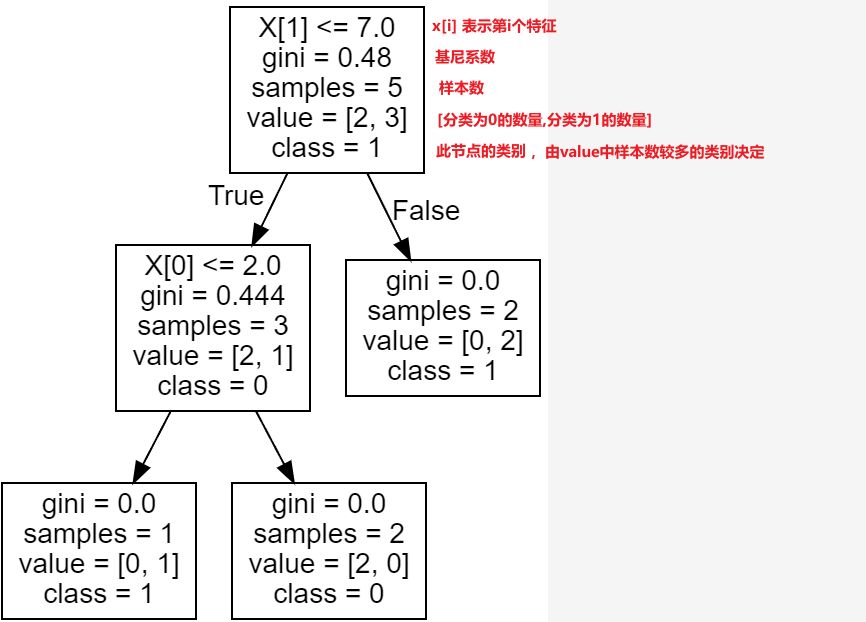

# random_state 参数

决策树 会选用 最小的 gini 作为划分依据，当多种不同划分方式 gini 相同，如果不设置random_state参数，就会导致程序每次运行时会获得不同的决策树。。

为了避免这种现象，保证程序每次运行时都能采用相同的节点划分方式，以获得相同的决策树，就需要设置random_state参数。该参数其实是一个随机数生成器的种子，可以设置为0、1、123等任意数字。

这种现象在数据量较少时容易出现，当数据量较大时出现的概率则较小

# 回归树demo

回归决策树 使用的划分算法是 均方误差MSE 

$MSE=\frac{1}{n}*\sum{(y^i-y'^i)^2}$

In [13]:
from sklearn.tree import DecisionTreeRegressor
X = [[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]]
y = [1, 2, 3, 4, 5]
model=DecisionTreeRegressor(max_depth=2,random_state=0)# max_depth 设置决策树的最大深度
model.fit(X,y)

DecisionTreeRegressor(max_depth=2, random_state=0)

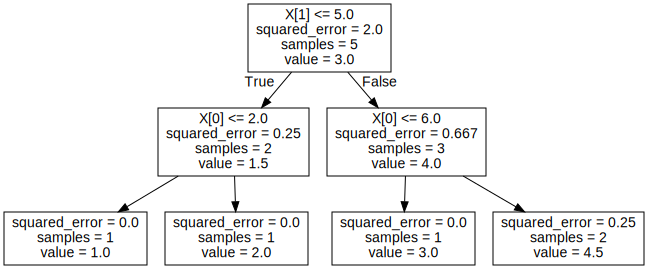

In [14]:
from sklearn.tree import export_graphviz
import graphviz
import os
dot_data=export_graphviz(model,out_file=None,class_names=['0','1'])
graphviz.Source(dot_data)

max_depth 设置决策树的最大深度

如果不限制决策树的深度，那么决策树将一直往下延伸，直到所有叶子节点的均方误差MSE都等于0为止。可能会导致过拟合

# 案例

In [16]:
import pandas as pd
df=pd.read_excel('./data/员工离职预测模型.xlsx')
df.head()

,工资,满意度,考核得分,工程数量,月工时,工龄,离职
0,低,3.8,0.53,2,157,3,1
1,中,8.0,0.86,5,262,6,1
2,中,1.1,0.88,7,272,4,1
3,低,7.2,0.87,5,223,5,1
4,低,3.7,0.52,2,159,3,1


In [18]:
df=df.replace({'工资':{'低':0,'中':1,'高':2}})
df.head()

,工资,满意度,考核得分,工程数量,月工时,工龄,离职
0,0,3.8,0.53,2,157,3,1
1,1,8.0,0.86,5,262,6,1
2,1,1.1,0.88,7,272,4,1
3,0,7.2,0.87,5,223,5,1
4,0,3.7,0.52,2,159,3,1


In [19]:
X=df.drop(columns='离职')
y=df['离职']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2,random_state =123)

In [21]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3,random_state=123)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=123)

In [23]:
y_pred=model.predict(X_test)
y_pred_proba=model.predict_proba(X_test)

In [24]:
from sklearn.metrics import roc_curve
fpr,tpr,thres=roc_curve(y_test,y_pred_proba[:,1])

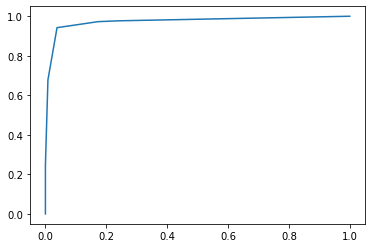

In [26]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr);

In [28]:
from sklearn.metrics import roc_auc_score
score=roc_auc_score(y_test,y_pred_proba[:,1])
score

0.9736722483245008

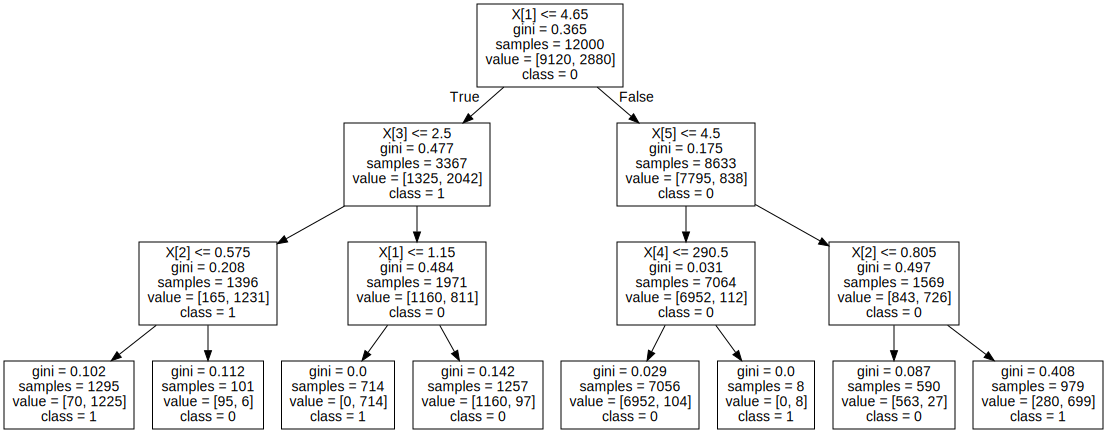

In [31]:
from sklearn.tree import export_graphviz
import graphviz
import os
dot_data=export_graphviz(model,out_file=None,class_names=['0','1'])
graphviz.Source(dot_data)

## 特征重要性

特征重要性 即 那些变量在模型中发挥的作用大

在决策树模型中，一个特征变量对模型整体的基尼系数下降的贡献越大，它的特征重要性就越大。举个例子，模型分裂到最后的叶子节点，整个系统的基尼系数下降值为0.3，如果所有根据特征变量A进行分裂的节点产生的基尼系数下降值之和为0.15，那么特征变量A的特征重要性就为0.15/0.3＝0.5，即50%。

In [29]:
model.feature_importances_#查看特征的重要性

array([0.        , 0.59810862, 0.14007392, 0.10638659, 0.00456495,
       0.15086592])

In [30]:
features=X.columns
importances=model.feature_importances_
importances_df=pd.DataFrame()
importances_df['特征名称']=features
importances_df['特征重要性']=importances
importances_df.sort_values('特征重要性',ascending=False)

,特征名称,特征重要性
1,满意度,0.598109
5,工龄,0.150866
2,考核得分,0.140074
3,工程数量,0.106387
4,月工时,0.004565
0,工资,0.000000


工资重要性为0的原因可能：
- 决策树深度不够，工资没发挥作用
- 工资分为高中低三档的缘故

特征重要性如何计算而来的？

首先需要计算整体的基尼系数下降值，根据最终8个叶子节点各自的基尼系数和样本数进行权重求和，得到新系统的基尼系数

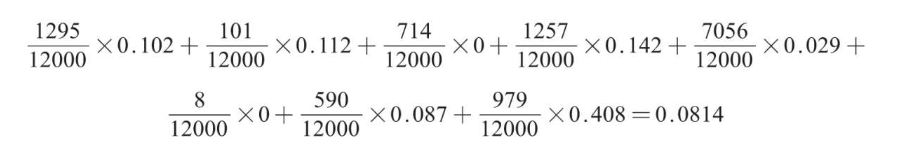

根节点的基尼系数为0.365，因此，整体基尼系数下降值为0.365-0.0814＝0.2836

“满意度”在决策树的根节点和第2层的第2个节点中都发挥了作用，系统产生的基尼系数下降值分别计算如下

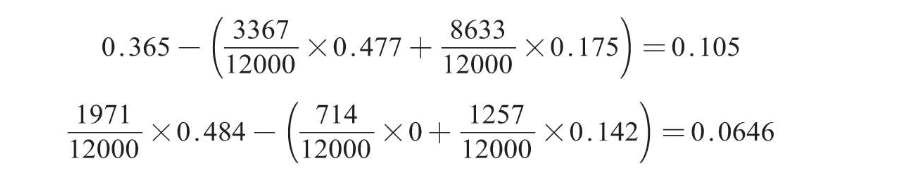

两者之和为0.1696，这就是“满意度”对整体的基尼系数下降的贡献大小，将其除以整体基尼系数下降值便是它的特征重要性：0.1696/0.2836＝0.598

# 决策树可视化